# Trabalho Dataset GDS1686

Datasets:
- gds1686.csv
- meta-gds1686.csv

## Introdução

Este estudo investigou os efeitos da privação de sono no cérebro de moscas fêmeas da espécie *Drosophila Melanogaster*, analisando variações na expressão genética. Os genes examinados já eram conhecidos por serem regulados de maneira distinta durante períodos de sono ou atividade.

Foram obtidas informações sobre os processos moleculares dinâmicos que sofrem alterações durante a vigília e o sono, por meio de um estudo de perfil de expressão de RNA. Analisaram-se as mudanças temporais no cérebro da *D. Melanogaster* em relação à duração do sono ou vigília anteriores. O projeto experimental permitiu determinar se os genes identificados como regulados de forma diferencial entre o sono e a vigília estavam a ser ativados ou desativados nestes estados.

Parte dos dados está relacionada ao controlo dos processos circadianos, com a coleta de animais em quatro pontos de tempo (0, 2, 4 e 6 horas) desde o início do período de descanso consolidado (*Zeitgeber Time* - ZT 14), sob duas condições: privação de sono e sono espontâneo. O ponto de tempo "0" refere-se ao controlo do período de sono.


In [62]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif

## 1ª Etapa 

Os dados presentes no conjunto de dados consistem em 14.010 linhas e 30 atributos/colunas. Por outro lado, os metadados compreendem 30 linhas e 4 atributos. Para assegurar a congruência entre os dados e os metadados, foi realizada a transposição dos dados.

As 30 instâncias referem-se às 30 moscas que foram submetidas às medições dos níveis de expressão dos genes em ambientes diversos. Notavelmente, os 14.010 atributos representam os genes que foram objeto de estudo.

### 1.1 Carregamento dos dados e metadados dos datasets

In [63]:
# Upload dos dados e metadados
dados = pd.read_csv("gds1686.csv", sep=',', index_col = 0)
metaDados = pd.read_csv("meta-gds1686.csv", sep = ",", index_col = 0)

In [64]:
data = dados.transpose()
print(data)

          141200_at  141201_at  141202_at  141203_at  141204_at  141205_at  \
GSM95424    3.77628    5.64283    6.80354    5.42622    4.58124    5.94997   
GSM95425    3.44458    5.47795    7.01271    5.53965    4.55277    5.94535   
GSM95444    3.76067    5.53370    6.81637    5.38007    4.45829    5.97233   
GSM95324    3.38473    5.58603    6.66803    5.26991    4.45801    5.62635   
GSM95421    3.57696    5.60629    6.73312    5.18558    4.56932    5.79158   
GSM95423    3.71310    5.57885    6.96012    5.36280    4.45476    5.75519   
GSM95325    3.59374    5.60380    6.55975    5.06871    4.47072    5.63485   
GSM95420    3.68243    5.40856    6.91156    5.31143    4.60259    5.84344   
GSM95422    3.71822    5.53217    6.53144    5.24742    4.68283    5.89039   
GSM95290    3.95261    5.55998    7.19880    5.51060    4.74907    6.27263   
GSM95292    3.67817    5.37299    7.10604    5.55732    4.73757    6.38052   
GSM95293    3.57283    5.60045    6.99170    4.92440    4.60691 

### 1.2 Caracterização dos dados 

In [65]:
# Contagem do número de atributos e instâncias dos dados e metadados
print('Dados: ', dados.values.shape)
print('Metadados: ', metaDados.values.shape)

Dados:  (14010, 30)
Metadados:  (30, 4)


Os dados são do tipo *float64*, ao passo que os metadados apresentam-se como *object*.

In [66]:
# Descrição dos tipos de atributos de dados
print("Os dados são do tipo:")
print(data.dtypes)

Os dados são do tipo:
141200_at               float64
141201_at               float64
141202_at               float64
141203_at               float64
141204_at               float64
                         ...   
AFFX-TrpnX-M_at         float64
AFFX-YEL002c/WBP1_at    float64
AFFX-YEL018w/_at        float64
AFFX-YEL021w/URA3_at    float64
AFFX-YEL024w/RIP1_at    float64
Length: 14010, dtype: object


In [67]:
# Descrição dos tipos de atributos dos metadados
print("Os metadados são do tipo:")
print(metaDados.dtypes)

Os metadados são do tipo:
sample         object
protocol       object
time           object
description    object
dtype: object


Este estudo proporcionou *insights* sobre os processos moleculares dinâmicos que sofrem alterações durante a vigília e o sono. Para alcançar tal objetivo, realizou-se um perfil de expressão de RNA, examinando as mudanças temporais no cérebro de *D. Melanogaster* em relação à duração prévia de sono ou vigília. O design experimental permitiu determinar se os genes identificados como regulados diferencialmente entre sono e vigília estavam ativos ou inativos nestes estados.

Uma parcela dos dados está associada ao controlo dos processos circadianos, com a recolha de amostras em quatro momentos temporais (0, 2, 4 e 6 horas) a partir do início do período de repouso consolidado [*Zeitgeber Time* (ZT) 14)], sob duas condições: **privação de sono** e **sono espontâneo**. O ponto "0" reflete o controlo do período de sono.

Os restantes dados foram gerados para monitorizar os efeitos da estimulação das moscas durante a privação de sono, concentrando-se na estimulação manual das moscas durante o **período ativo de ZT10-ZT14**. Neste conjunto de dados, foram analisadas moscas no ponto "0"/ZT10 (controlo) e após 4 horas/ZT14, tanto para moscas perturbadas como não perturbadas.

Cada atributo nos dados representa um gene em estudo, e cada instância corresponde a uma amostra. Dessa forma, cada linha contém os valores de expressão de 14.010 genes, sendo cada célula representada por um dado do tipo *float64*.

No que diz respeito aos metadados, os atributos englobam a amostra, o ambiente a que foi sujeita, o período de exposição ao ambiente e uma descrição de cada instância. Estes atributos são do tipo *object*. Dos quatro atributos nos metadados (**"sample"**, **"protocol"**, **"time"**, **"description"**), apenas **"protocol"** incorpora informações pertinentes para a análise dos dados e a construção de modelos de *machine learning*.

### 1.3 Análise dos dados e metadados dos datasets

In [68]:
# análise dos dados
data.describe()

,141200_at,141201_at,141202_at,141203_at,141204_at,141205_at,141206_at,141207_at,141208_at,141209_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3.607873,5.489350,6.952435,5.249813,4.599524,5.954323,6.990018,4.392433,5.405541,7.439440,...,4.944844,4.178191,3.572110,2.385417,2.683112,2.808675,2.618219,2.465750,2.392707,2.867779
std,0.134341,0.091277,0.200513,0.213595,0.109908,0.211262,0.125764,0.250060,0.193319,0.134838,...,1.395989,0.638595,1.155027,0.110678,0.086954,0.093582,0.103548,0.102161,0.086281,0.089716
min,3.337230,5.314440,6.531440,4.644220,4.388890,5.548860,6.773590,3.662410,5.021590,7.122190,...,3.750490,3.496770,2.624210,2.247740,2.467410,2.653150,2.441050,2.334520,2.226010,2.692800
25%,3.499017,5.413712,6.823830,5.186327,4.506510,5.808288,6.906235,4.248295,5.287640,7.366212,...,4.025593,3.727108,2.796718,2.304302,2.642300,2.745170,2.539148,2.392658,2.339292,2.812485
50%,3.596040,5.497505,6.991820,5.280945,4.604750,5.947660,6.983225,4.440900,5.403820,7.423025,...,4.183005,3.925130,2.948045,2.354715,2.677775,2.792335,2.622440,2.437870,2.387635,2.867830
75%,3.696905,5.556718,7.126535,5.358195,4.680313,6.071495,7.066717,4.500497,5.517870,7.528073,...,6.571570,4.771835,4.796132,2.457800,2.738055,2.855735,2.677685,2.531627,2.444327,2.909845
max,3.952610,5.642830,7.231070,5.571400,4.795950,6.380520,7.301070,4.858860,5.840410,7.731290,...,8.201870,5.836320,6.672570,2.685690,2.840200,3.043230,2.896040,2.730310,2.618280,3.040000



Como evidenciado pelo *count*, constatamos a presença de 30 instâncias, indicando a ausência de *missing values*. Entretanto, procederemos à confirmação.

In [69]:
# Missing Values - verifica valores em falta
print("Missing Values nos dados:")
print(data.isnull().sum().sum())   

# O primeiro .sum soma ao longo das colunas e o segundo .sum adiciona todas as contagens.

print("Missing Values nos metadados:")
print(metaDados.isnull().sum().sum())

Missing Values nos dados:
0
Missing Values nos metadados:
0


Após verificar a inexistência de valores ausentes (*missing values*), é imperativo confirmar a inexistência de valores NaN, isto é, nulos. Em caso de deteção, é recomendável proceder à sua eliminação.

In [70]:
# Remover os genes que têm todos os valores como NaN (dados nulos), usando o parâmetro inplace = True para alterar directamente na variável data
data.dropna(inplace = True)

Podemos corroborar que não ocorreu eliminação de dados, visto que as dimensões do conjunto de dados permanecem inalteradas.

In [71]:
# Ver a nova dimensão dos dados
data.values.shape 

(30, 14010)

In [72]:
# Calcular as estatísticas e ordenar pelo desvio padrão
data_stats = data.apply(lambda x: [x.min(), x.max(), x.std()]).T

# Adicionar colunas para min, max, e std
data_stats.columns = ['min', 'max', 'std']

# Ordenar pelo desvio padrão
data_stats.sort_values(by='std', ascending=False)

,min,max,std
AFFX-DapX-3_at,2.67399,9.13717,2.331775
AFFX-DapX-M_at,2.57384,8.60097,2.127964
AFFX-DapX-5_at,2.59945,7.75179,1.726795
143096_f_at,3.86214,9.04036,1.529624
AFFX-ThrX-3_at,3.75049,8.20187,1.395989
...,...,...,...
153140_at,5.71645,5.99938,0.059461
141690_at,6.89647,7.16224,0.058273
153642_at,6.20163,6.41713,0.049048
153151_at,4.39932,4.59023,0.048230


Neste conjunto de dados, as amostras estão organizadas em diferentes ambientes de recolha. Considerando que existem apenas 30 amostras e, portanto, uma quantidade limitada de dados, optou-se por não remover *outliers*, uma vez que não se revelou pertinente. Além disso, não foram identificados valores nulos nos dados. Dado que todos os dados estão representados na mesma escala (nível de expressão génica) e o número de atributos é consistente entre todas as amostras, não se mostrou necessário realizar normalização ou balanceamento dos dados.



### 1.3 Análise estatística dos dados e metadados dos datasets

#### Filtragem de Dados

- Variabilidade dos Dados

O *VarianceThreshold* é uma técnica de pré-processamento de dados utilizada principalmente em conjuntos de dados nos quais as *features* (variáveis) apresentam baixa variação. A ideia é remover as *features* que têm pouca ou nenhuma variação, pois não contribuem significativamente para a modelagem e podem até introduzir ruído desnecessário.

A variação de uma *feature* é medida pelo desvio padrão ou pela variância. Se uma *feature* tem baixa variação, significa que os seus valores são relativamente constantes em todo o conjunto de dados, o que indica que ela não fornece muita informação útil para distinguir entre diferentes amostras.

In [73]:

# Remover amostras que variam pouco preservando as features com maior variabilidade
threshold = 0.01

from sklearn.feature_selection import VarianceThreshold

# Remover todas as colunas (amostras) que possuem pouco variabilidade
var_threshold = VarianceThreshold(threshold=threshold)
x_variance = var_threshold.fit_transform(data)

# Obter os índices das colunas com alta variância
variance_columns = data.columns[var_threshold.get_support()]

# Criar um novo dataframe apenas com as colunas de maior variância
high_variance_data = data[variance_columns]
print("Features com maior variância:\n", high_variance_data.shape)
high_variance_data.head()

Features com maior variância:
 (30, 11425)


,141200_at,141202_at,141203_at,141204_at,141205_at,141206_at,141207_at,141208_at,141209_at,141210_at,...,AFFX-MurIL10_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at
GSM95424,3.77628,6.80354,5.42622,4.58124,5.94997,7.10323,4.31335,5.25411,7.65238,3.52910,...,2.88433,6.86330,5.84211,5.12255,7.55184,5.43532,5.67326,2.36744,2.89604,2.34574
GSM95425,3.44458,7.01271,5.53965,4.55277,5.94535,6.90955,4.38611,5.27720,7.51818,3.55030,...,3.07804,5.72100,5.08416,4.30022,6.78527,5.05907,4.92737,2.27453,2.68409,2.46161
GSM95444,3.76067,6.81637,5.38007,4.45829,5.97233,6.94380,4.20917,5.36327,7.63492,3.74692,...,3.08857,7.26654,6.39501,5.57022,8.20187,5.83632,6.67257,2.40788,2.74543,2.42794
GSM95324,3.38473,6.66803,5.26991,4.45801,5.62635,6.82933,4.20606,5.32454,7.45160,3.42581,...,3.14887,5.65064,4.64463,4.11344,6.30469,5.02071,4.60969,2.33026,2.56479,2.40380
GSM95421,3.57696,6.73312,5.18558,4.56932,5.79158,6.97706,4.22661,5.40733,7.53137,3.50344,...,3.06756,5.63462,4.63722,3.99599,6.77700,4.85726,5.04870,2.35221,2.59447,2.38402


- Por testes estatísticos univariados

Testes estatísticos univariados são procedimentos estatísticos projetados para analisar e tirar conclusões sobre uma única variável num conjunto de dados. Estes testes são comumente utilizados para avaliar se há diferenças significativas ou padrões numa única variável. Os testes estatísticos univariados ajudam a entender as características e comportamentos de uma única variável.
A escolha do teste estatístico univariado depende da natureza da variável que está a ser analisado.

#### SelectKBest

O *SelectKBest* é uma estratégia de filtragem que escolhe os k melhores recursos (ou colunas) de um conjunto de dados, visando reter apenas os mais relevantes. Esta técnica avalia cada recurso individualmente mediante uma métrica escolhida (*F-value*) e, em seguida, seleciona os k recursos com a pontuação mais elevada.

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecionar os 10 melhores amostras, usando f_classif (ANOVA F-value between label/feature for classification tasks)
skb = SelectKBest(f_classif, k=10)

# fit and transform data
labels = data.iloc[:,0]
x_kbest = skb.fit_transform(data.iloc[:,1:], labels)

# Obter o nome das colunas selecionadas
kbest_columns = data[skb.get_feature_names_out()]

# Criar um DataFrame resultante de x_kbest mantendo o nome das colunas e indices
data_kbest = pd.DataFrame(data=x_kbest, index=data.index, columns=kbest_columns.columns)
print(data_kbest.shape)
data_kbest.head()

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


(30, 10)


,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
GSM95424,7.55184,5.43532,5.67326,2.36744,2.66457,2.72344,2.89604,2.34574,2.46772,2.87624
GSM95425,6.78527,5.05907,4.92737,2.27453,2.46741,2.77508,2.68409,2.46161,2.40230,2.88107
GSM95444,8.20187,5.83632,6.67257,2.40788,2.61438,2.65315,2.74543,2.42794,2.37488,2.93086
GSM95324,6.30469,5.02071,4.60969,2.33026,2.64872,2.68254,2.56479,2.40380,2.37482,2.81991
GSM95421,6.77700,4.85726,5.04870,2.35221,2.73892,2.73579,2.59447,2.38402,2.45214,2.85487


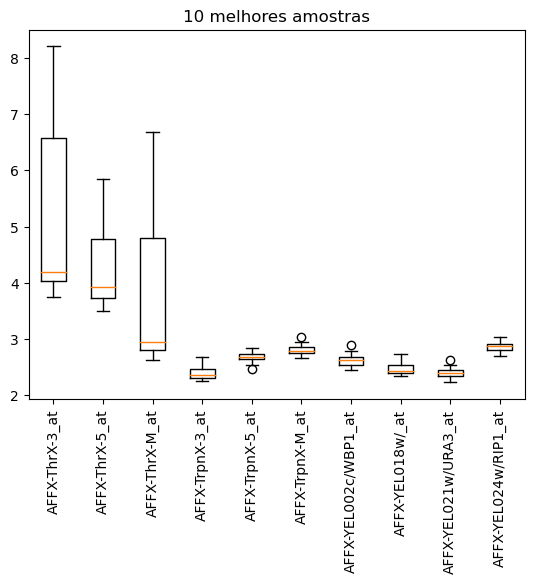

In [75]:
import matplotlib.pyplot as plt

# Criar o boxplot dos dados selecionados com os 10 melhores amostras
plt.boxplot(data_kbest)
plt.title('10 melhores amostras')
plt.xticks(np.arange(1, 11), data_kbest.columns, rotation=90)
plt.show()

#### SelectPercentile

O *SelectPercentile* é uma técnica de seleção de características que permite escolher as características mais relevantes de um conjunto de dados com base numa medida de importância, como o valor F da ANOVA (Análise de Variância) entre classes/*features*, especialmente aplicado a tarefas de classificação.

Esta abordagem é útil quando se deseja reduzir a dimensionalidade do conjunto de dados, mantendo apenas as características mais informativas para a tarefa em questão.

In [76]:
from sklearn.feature_selection import SelectPercentile, f_classif

# Selecionar as melhores colunas usando f_classif (ANOVA F-value between label/feature for classification tasks)
selector = SelectPercentile(f_classif, percentile=25)

# fit and transform data
labels = data.iloc[:,0]
x_best = selector.fit_transform(data.iloc[:,1:], labels)

# Obter o nome das colunas selecionadas
best_columns = data[selector.get_feature_names_out()]

# Criar um DataFrame resultante de x_best mantendo o nome das colunas e indices
data_best = pd.DataFrame(data=x_best, index=data.index, columns=best_columns.columns)
print(data_best.shape)
data_best.head()

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


(30, 3502)


,141201_at,141202_at,141203_at,141204_at,141205_at,141206_at,141207_at,141208_at,141209_at,141210_at,...,144693_at,144694_at,144695_at,144696_at,144697_at,144698_at,144699_at,144700_at,144701_at,144702_at
GSM95424,5.64283,6.80354,5.42622,4.58124,5.94997,7.10323,4.31335,5.25411,7.65238,3.52910,...,4.90477,5.35752,2.89185,3.16707,4.58981,6.43573,7.37919,6.18249,9.44246,5.02405
GSM95425,5.47795,7.01271,5.53965,4.55277,5.94535,6.90955,4.38611,5.27720,7.51818,3.55030,...,5.01567,5.35918,2.85062,3.10860,4.64608,6.48383,7.45468,6.13735,9.57269,4.76370
GSM95444,5.53370,6.81637,5.38007,4.45829,5.97233,6.94380,4.20917,5.36327,7.63492,3.74692,...,4.95230,5.45944,2.69804,2.92900,4.88314,6.20721,7.25079,6.12809,9.63778,5.07952
GSM95324,5.58603,6.66803,5.26991,4.45801,5.62635,6.82933,4.20606,5.32454,7.45160,3.42581,...,5.07707,5.47173,2.80392,3.13503,5.00198,6.45948,7.41492,6.15963,9.18983,4.93933
GSM95421,5.60629,6.73312,5.18558,4.56932,5.79158,6.97706,4.22661,5.40733,7.53137,3.50344,...,5.01669,5.62500,2.63672,3.03565,4.84431,6.22364,7.42379,6.36768,8.94567,5.14423


## 2ª Etapa

Este conjunto de dados é caracterizado por um elevado número de atributos (colunas), totalizando 14.010, correspondentes aos diferentes genes objeto de estudo. A realização de uma análise de Componentes Principais (*PC - Principal Components*) possibilitará a redução desse número, destacando apenas os atributos que conseguem explicar a maioria da variabilidade dos dados. Por exemplo, ao aplicar uma Análise de Componentes Principais que explique 90% dessa variabilidade, será possível reduzir o número de atributos àqueles que contribuem para essa explicação.

#### PCA

[2.39691084e-01 1.58470120e-01 7.16860362e-02 4.50942771e-02
 3.79773784e-02 3.63413360e-02 3.27745431e-02 2.90720793e-02
 2.77946897e-02 2.40645040e-02 2.23265235e-02 2.06159151e-02
 1.96604660e-02 1.90771731e-02 1.86079279e-02 1.76392933e-02
 1.72669578e-02 1.62588555e-02 1.57998798e-02 1.52603008e-02
 1.47597314e-02 1.43374509e-02 1.40301536e-02 1.31051139e-02
 1.25497475e-02 1.23073635e-02 1.19131001e-02 1.12827570e-02
 1.02352418e-02 1.48334464e-35]
0.702966047660038


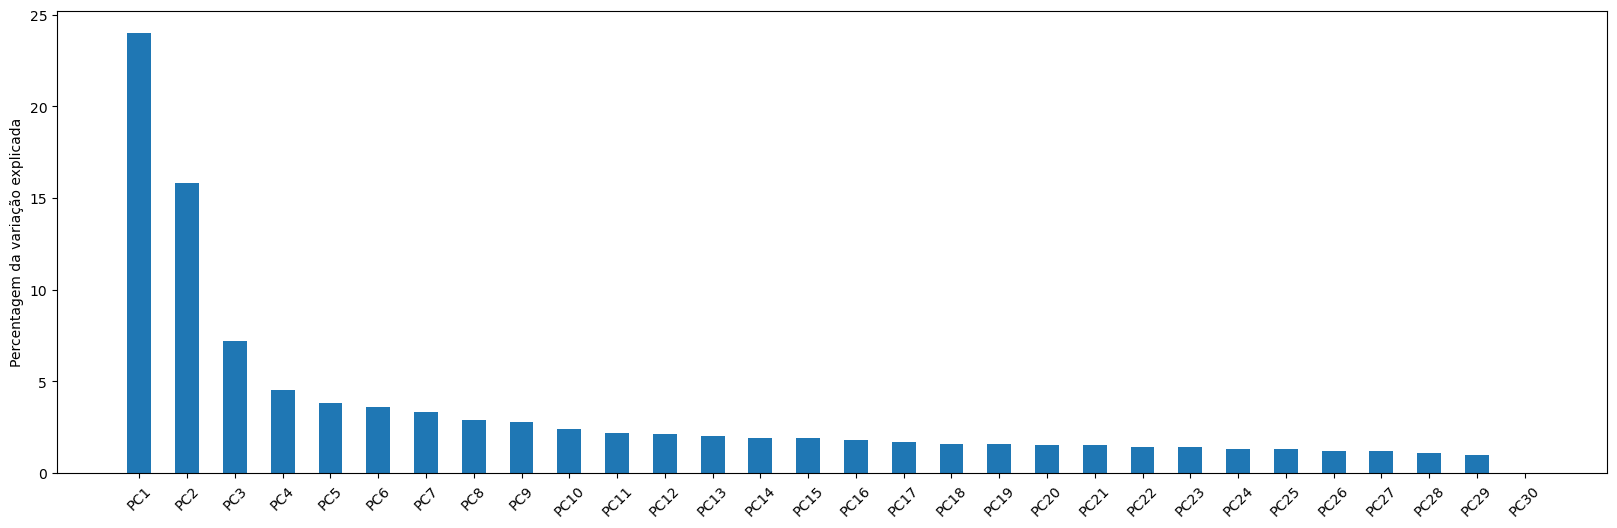

0.702966047660038 9
0.7252925711182634 10
0.7459084862141241 11
0.7655689522059181 12
0.7846461252670309 13
0.8032540531492964 14
0.8208933464185277 15
0.8381603042439877 16
0.8544191596971646 17
0.870219039463503 18
0.885479340219954 19
0.9002390716175566 20
0.9145765225538591 21
0.9286066761961073 22
0.9417117901049409 23
0.9542615375943397 24
0.96656890113659 25
0.9784820012019475 26
0.9897647582223361 27
1.0000000000000002 28
1.0000000000000002 29


In [77]:
# 30 amostras para análise
n=30

pca = PCA(n_components=n)
data_scale = preprocessing.scale(data)
pca.fit(data_scale)  # media e desvio
x_reduced = pca.transform(data_scale)   
principalComponents = pca.fit_transform(x_reduced)  # escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:10]))  # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)

plt.show()

soma=0
for i in range(len(pca.explained_variance_ratio_)):
    soma+=pca.explained_variance_ratio_[i]
    if soma>=0.70:
        print(soma,i)

A representação gráfica das percentagens de variabilidade explicadas pelos Componentes Principais (PC) revela que, a partir dos 10 primeiros componentes, a contribuição adicional de cada novo componente principal para a explicação da variabilidade é bastante reduzida. Os 10 primeiros PC conseguem descrever 72.5% da variabilidade total, enquanto que a alcançar os 90% de variabilidade "standard" são necessários 20 PC.

Seguindo esta análise, procedeu-se à avaliação dos scores obtidos através da Análise de Componentes Principais (PCA), recorrendo a representações gráficas. Este método permite identificar de forma mais clara as correlações entre os dados e analisar se existem tendências associadas aos diferentes protocolos implementados. Esta análise posiciona as amostras num espaço bidimensional, em que o eixo x reflete a separação com base nos scores do primeiro PCA, enquanto o eixo y representa a separação com base nos scores do segundo PCA.

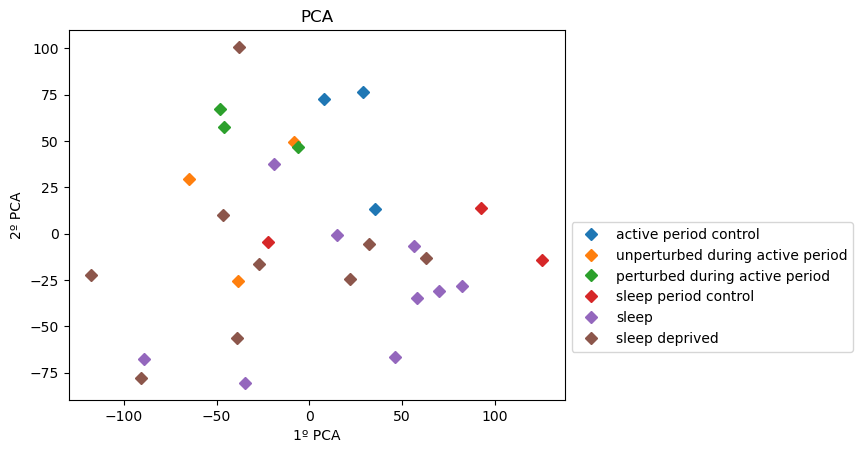

In [78]:
for tipo in metaDados['protocol'].unique():
    sp = data.index[metaDados['protocol']==tipo]
    l=[]
    for x in sp:
        idx = data.index.get_loc(x)
        l.append(idx)
    plt.plot(x_reduced[l,0],x_reduced[l,1], 'D' , label=tipo)
    
plt.title("PCA")

plt.xlabel("1º PCA")
plt.ylabel("2º PCA")


plt.legend(loc='best', shadow=False, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

Apesar de se constatar que, por exemplo, entre os protocolos de '*sleep*' e '*sleep deprived*' ocorre uma diferenciação, especialmente evidente no 1º Componente Principal (PCA), esta não se revela tão nítida como inicialmente antecipado, dada a significativa dispersão observada. Destaca-se a concentração notável das amostras do protocolo '*perturbed during active*', indicando padrões de ativação génica notavelmente semelhantes, sugerindo uma elevada qualidade destas amostras. Mesmo com uma maior diferenciação no 2º PCA, as amostras de '*active period control*' também apresentam proximidade considerável entre si. Quanto às amostras de '*sleep period control*', a sua separação ocorre principalmente ao longo do 1º PCA, com escassa dispersão no eixo dos y (2º PCA), atribuível à disparidade nos valores dos genes utilizados para construir o 1º PCA. Por fim, as amostras de '*unperturbed during active period*' também evidenciam um agrupamento relativamente coeso.

#### Dendograma

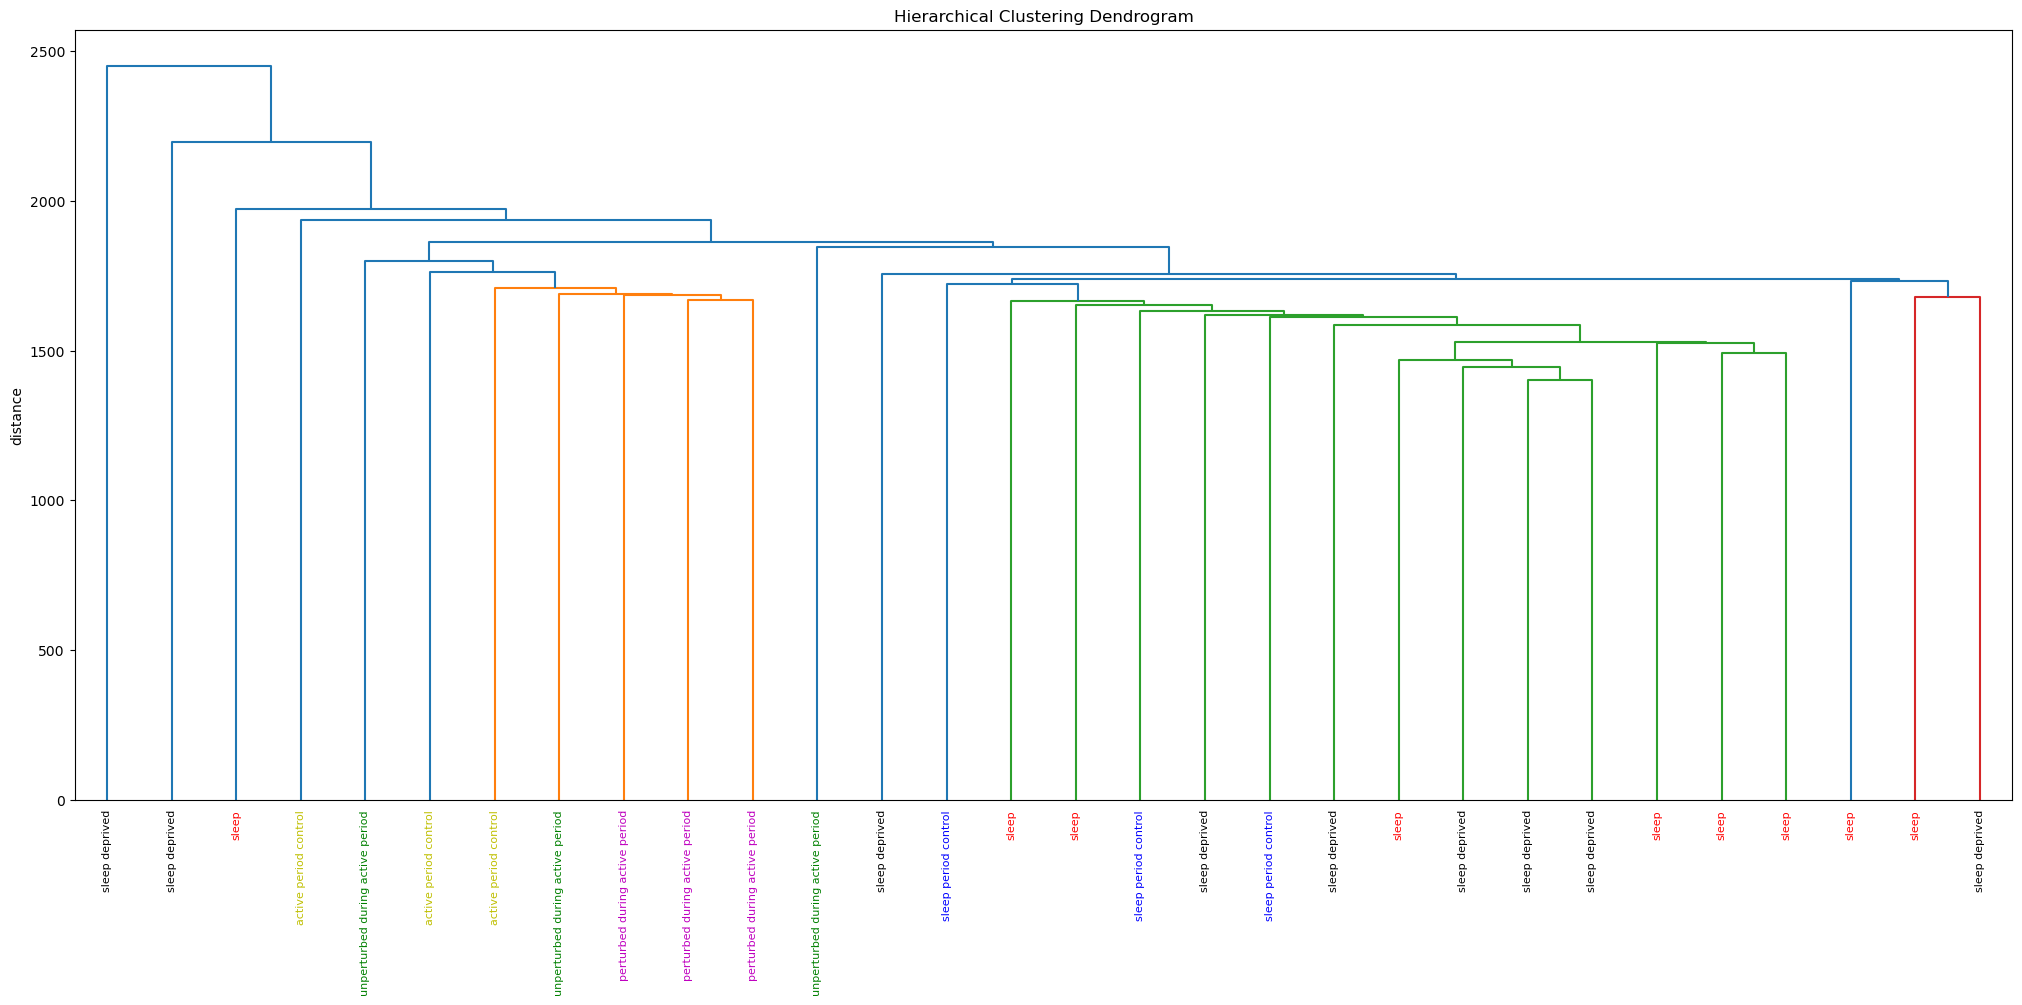

In [79]:
# Cria-se um dendograma - resultado de um clustering hierárquico 

Z = linkage(data, metric='cityblock')
metaDados['labels'] = metaDados['protocol'] 


plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(metaDados['labels']),
    leaf_rotation=90.,  # roda os eixos dos x
    leaf_font_size=8.,  # tamanho da letra para a label
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'active period control': 'y', 
                'unperturbed during active period': 'g', 
                'perturbed during active period': 'm',  
                'sleep period control': 'b', 
                'sleep': 'r',
                'sleep deprived': 'k',
               }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

A análise do *cluster* hierárquico proporciona *insights* valiosos:

- As moscas que passaram pelo período de sono revelam padrões de expressão mais similares entre si, independentemente do período considerado, predominando no *cluster* verde.

- Moscas perturbadas durante o período ativo exibem padrões expressivos igualmente próximos entre si, agrupando-se no *cluster* laranja. Este agrupamento sugere a ativação de mecanismos comuns em moscas perturbadas.

- As moscas privadas de sono demonstram expressões mais diversas, sugerindo que a natureza da resposta nessas situações varia de organismo para organismo e ao longo do tempo de exposição à privação do sono. Dado que a privação do sono tende a desregular funções normais, essa desregulação pode manifestar-se de forma única em cada organismo.

#### Método do cotovelo - Escolher o k

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

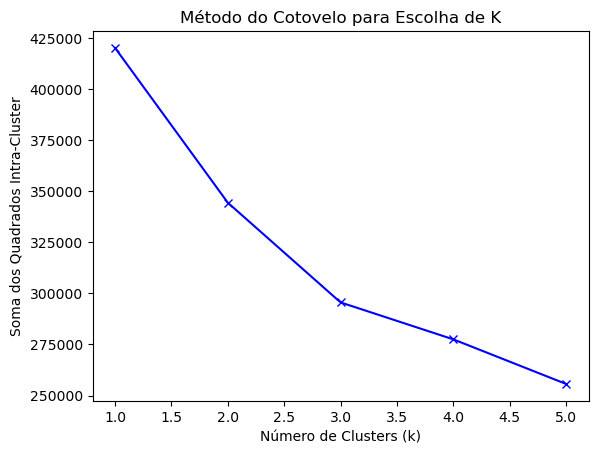

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suponha que X seja seus dados
distortions = []
K_range = range(1, 6)

for k in K_range:
    kmeanModel = KMeans(n_clusters=k, max_iter=1000)
    kmeanModel.fit(data_scale)
    distortions.append(kmeanModel.inertia_)

plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.title('Método do Cotovelo para Escolha de K')
plt.show()

In [81]:
from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, metaDados['protocol'], rownames=['clusters'] )

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


protocol,active period control,perturbed during active period,sleep,sleep deprived,sleep period control,unperturbed during active period
clusters,,,,,,
0,2,3,1,1,0,2
1,1,0,6,3,2,0
2,0,0,2,5,1,1


A análise de *clusters* executada através do método k-means reforça as conclusões anteriores, evidenciando que as moscas que passaram pelo período de sono predominam no *cluster* 1, enquanto aquelas perturbadas durante o período ativo estão todas agrupadas no *cluster* 2. Por sua vez, as moscas privadas de sono exibem uma distribuição mais dispersa, corroborando a variabilidade observada anteriormente.

## 3ª Etapa

A etapa subsequente consiste na implementação de modelos de *Machine Learning*. Portanto, é imperativo proceder à divisão dos dados em conjuntos de treino e teste. O conjunto de treino é utilizado como entrada para o modelo, permitindo que este estabeleça as suas relações. Por sua vez, o conjunto de teste, como o próprio nome sugere, é empregado para avaliar a eficácia dessas relações na previsão do ambiente ao qual as moscas foram submetidas.

### Modelos com Percentage Split

In [82]:
from sklearn.model_selection import train_test_split

dados_entrada = data.values
dados_saida = metaDados['protocol'].values
entrada_proc = preprocessing.scale(dados_entrada)
print(len(entrada_proc))

treinoX, testeX, treinoY, testeY = train_test_split(entrada_proc, dados_saida, test_size=0.3)
print("TreinoX ", treinoX.shape)
print("TesteX", testeX.shape)
print("TreinoY ", treinoY.shape)
print("TesteY", testeY.shape)

30
TreinoX  (21, 14010)
TesteX (9, 14010)
TreinoY  (21,)
TesteY (9,)


#### Verificação da distribuição dos dados para treino e para teste

sleep                               7
sleep deprived                      6
unperturbed during active period    2
perturbed during active period      2
active period control               2
sleep period control                2
dtype: int64


<Axes: >

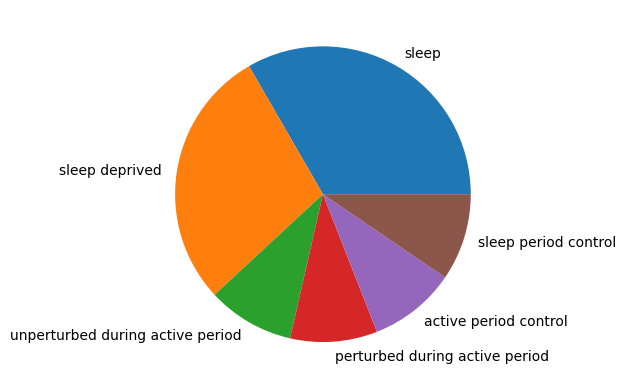

In [83]:
# É preciso converter para um objeto tipo pandas para poder usar o value_counts()

treinoY_series = pd.Series(treinoY) 
contagem_treino = treinoY_series.value_counts()
print(contagem_treino)
contagem_treino.plot.pie()

sleep deprived                      3
sleep                               2
sleep period control                1
unperturbed during active period    1
active period control               1
perturbed during active period      1
dtype: int64


<Axes: >

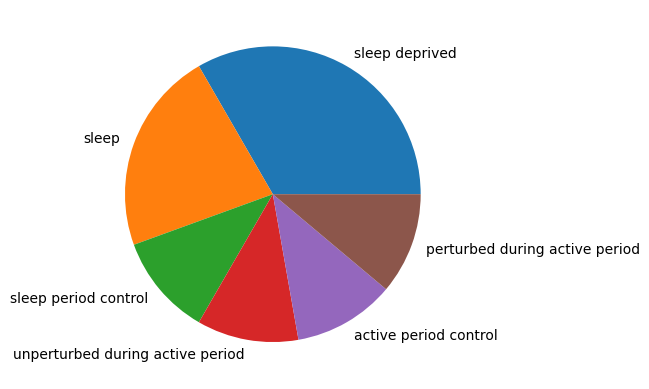

In [84]:
testeY_series = pd.Series(testeY)
contagem_teste = testeY_series.value_counts()
print(contagem_teste)
contagem_teste.plot.pie()

#### K-nearest neightbors (KNN)

In [85]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)
print('Accuracy: ', accuracy_score(preds_knn, testeY))

Accuracy:  0.7777777777777778


#### Logistic regression

In [86]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)
print('Accuracy: ', logistic.score(testeX,  testeY))

Accuracy:  0.6666666666666666


#### Decision Tree 

In [87]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)
print('Accuracy: ', tree_model.score(testeX,  testeY))

Accuracy:  0.5555555555555556


#### SVMs linear kernel

In [88]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

Accuracy:  0.6666666666666666


#### SVMs RBF kernel

In [89]:
from sklearn import svm

svm_model = svm.SVC(gamma=0.003,C=3)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

Accuracy:  0.2222222222222222


#### Random forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(treinoX, treinoY)
previsoes = rf_model.predict(testeX)

score_rf = accuracy_score(testeY, previsoes)

print("Score Random Forest:", score_rf)

Score Random Forest: 0.6666666666666666


#### Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)
print('Accuracy: ', gnb_model.score(testeX,  testeY))

Accuracy:  0.4444444444444444


In [92]:
tab = {'Modelo': ['K-Neighbours', 'Logistic regression','Decision Tree','Random forest', 'SVMs linear kernel', 'SVMs RBF kernel' ,'Naive Bayes'],
        'Accuracy': [ accuracy_score(preds_knn, testeY), logistic.score(testeX,  testeY), tree_model.score(testeX,  testeY), svm_model.score(testeX,  testeY), svm_model.score(testeX,  testeY), accuracy_score(testeY, previsoes), gnb_model.score(testeX,  testeY) ],
        }
tabela = pd.DataFrame(tab)

print(tabela.to_string())

                Modelo  Accuracy
0         K-Neighbours  0.777778
1  Logistic regression  0.666667
2        Decision Tree  0.555556
3        Random forest  0.222222
4   SVMs linear kernel  0.222222
5      SVMs RBF kernel  0.666667
6          Naive Bayes  0.444444


A capacidade preditiva dos modelos em relação ao tipo de ambiente ('protocol') ao qual as moscas foram submetidas revelou-se insuficiente, evidenciada pelos valores de 'accuracy' obtidos nos 6 modelos utilizados. O cenário ideal seria a precisão na previsão do conjunto da coluna relevante nos metadados: 'protocol'. Em outras palavras, os modelos deveriam ser capazes de antecipar o ambiente específico ao qual as moscas foram expostas.

Esta dificuldade pode ser atribuída ao número extremamente limitado de amostras disponíveis (apenas 30). A escassez de dados resulta em um conjunto de treino muito reduzido (apenas 21, dado que o dataset foi dividido em 2/3 para teste e 1/3 para treino), fornecendo aos modelos uma quantidade limitada de informações para estabelecerem relações de forma robusta.

Apesar dessas limitações, conduziu-se uma análise de validação cruzada na tentativa de avaliar o desempenho relativo de cada modelo.

### Modelos com Cross-Validation

#### K-nearest neighbors

In [93]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(estimator = knn, X= dados_entrada, y= dados_saida, cv= 3)
print("Média", scores_knn.mean())

Média 0.5


#### Logistic Regression

In [94]:
scores_logistic = cross_val_score(estimator = logistic, X= dados_entrada, y= dados_saida, cv= 3)
print('Média: ', scores_logistic.mean())

Média:  0.7666666666666666


#### Decision Trees

In [95]:
scores_tree_model = cross_val_score(estimator = tree_model, X= dados_entrada, y= dados_saida, cv= 3)
print('Média: ', scores_tree_model.mean())

Média:  0.5333333333333333


#### SVMs Linear Kernel

In [96]:
from sklearn import svm

svm_linear = svm.SVC(kernel = "linear")

score_svm = cross_val_score(svm_linear, dados_entrada, dados_saida, cv = 3)
print('Média: ', score_svm.mean())

Média:  0.6666666666666666


#### SVMs RBF kernel

In [97]:
from sklearn import svm

svm_model = svm.SVC(gamma=0.001, C=10.)

score_svm2 = cross_val_score(svm_model, dados_entrada, dados_saida, cv = 3)
print('Média: ', score_svm2.mean())

Média:  0.6666666666666666


#### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

score_rf = cross_val_score(svm_model, dados_entrada, dados_saida, cv = 3)
print('Média: ', score_rf.mean())

Média:  0.6666666666666666


#### Naive Bayes

In [99]:
scores_gnb_model = cross_val_score(estimator = gnb_model, X= dados_entrada, y= dados_saida, cv= 3)
print('Média: ', scores_gnb_model.mean())

Média:  0.4333333333333333


In [100]:
tab = {'Modelo': ['K-Neighbours', 'Logistic regression','Decision Tree','Random forest', 'SVMs linear kernel', 'SVMs RBF kernel' ,'Naive Bayes'],
        "Average": [scores_knn.mean(), scores_logistic.mean(), scores_tree_model.mean(), score_svm.mean(), score_svm2.mean(),score_rf.mean(), scores_gnb_model.mean()],
        }
tabela = pd.DataFrame(tab)

print(tabela.to_string())



                Modelo   Average
0         K-Neighbours  0.500000
1  Logistic regression  0.766667
2        Decision Tree  0.533333
3        Random forest  0.666667
4   SVMs linear kernel  0.666667
5      SVMs RBF kernel  0.666667
6          Naive Bayes  0.433333


### 2ª Estratégia

A partir dos dados filtrados obtidos na estatística da etapa 1, que tinha como objetivo reduzir a dimensionalidade da base de dados, nesta segunda estratégia iremos verificar se os resultados a partir destes dados são melhores que os obtidos na estratégia anterior.

In [101]:
from sklearn import linear_model, svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB


input_data = data_kbest.values
#output_data = meta_data['labels'].values
output_data = metaDados['protocol'].values
input_sc = preprocessing.scale(input_data)

treinoX, testeX, treinoY, testeY = train_test_split(input_sc, output_data, train_size=2/3, random_state=0)

#K-Neighbours
knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)
      
scores_knn = cross_val_score(estimator = knn, X= input_sc, y= output_data, cv= 3)

#Regressão Logística
logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)

scores_logistic = cross_val_score(estimator = logistic, X= input_sc, y= output_data, cv= 3)

#Decision Tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)

scores_tree_model = cross_val_score(estimator = tree_model, X= input_sc, y= output_data, cv= 3)


#SVM Linear
svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)

scores_svm = cross_val_score(estimator = svm_model, X= input_sc, y= output_data, cv= 3)


#SVM RBF

svm_modelRBF = svm.SVC(gamma=0.003,C=3)
svm_modelRBF = svm_model.fit(treinoX, treinoY)

svm_modelRBF2 = svm.SVC(gamma=0.001, C=10.)
score_svmRBF = cross_val_score(svm_modelRBF2, input_sc, output_data, cv = 3)


#Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(treinoX, treinoY)
previsoes = rf_model.predict(testeX)

score_rf = accuracy_score(testeY, previsoes)
score_rf2 = cross_val_score(svm_model, input_sc, output_data, cv = 3)

#Naive Bayes
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)

scores_gnb_model = cross_val_score(estimator = gnb_model, X= input_sc, y= output_data, cv= 3)

#Tabela
tab = {'Modelo': ['K-Neighbours','Regressao Logistica','Decision Tree','SVM Linear',"SVM RBF", "Random Forest", 'Naive Bayes'],
        'Accuracy': [accuracy_score(preds_knn, testeY), logistic.score(testeX,  testeY), tree_model.score(testeX,  testeY),  svm_model.score(testeX,  testeY),svm_modelRBF.score(testeX,testeY),rf_model.score(testeX,testeY), gnb_model.score(testeX,  testeY)],
        'Média CV': [scores_knn.mean(), scores_logistic.mean(), scores_tree_model.mean(), scores_svm.mean(), score_svmRBF.mean(),score_rf2.mean(), scores_gnb_model.mean()]}
tabela = pd.DataFrame(tab)

# Print the dataframe as a table
print(tabela.to_string())

                Modelo  Accuracy  Média CV
0         K-Neighbours       0.3  0.466667
1  Regressao Logistica       0.2  0.333333
2        Decision Tree       0.5  0.400000
3           SVM Linear       0.5  0.433333
4              SVM RBF       0.5  0.266667
5        Random Forest       0.4  0.433333
6          Naive Bayes       0.4  0.333333


# Conclusão

Ao longo desta investigação, constatou-se que um dos desafios prementes, para além da limitada quantidade de amostras, reside na elevada dimensionalidade do conjunto de dados. Essa característica pode comprometer a robustez dos modelos desenvolvidos e a sua aplicabilidade futura, em virtude da procura por relações na expressão de genes que possuem um impacto mínimo derivado da privação do sono.

Neste contexto, direcionou-se uma atenção acrescida para o estudo de parâmetros estatísticos pertinentes, visando a redução da dimensionalidade. Este foco visa não apenas aprimorar a generalização dos modelos, mas também a consideração de outros fatores cruciais para a qualidade das análises efetuadas.

Debruçando-se sobre o *machine learning* aplicado a ambas as estratégias, é possível inferir que na *accuracy* da segunda estratégia obteve-se melhores resultados.